In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandasql import sqldf

In [2]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


# Question 1a: Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [4]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


` $3145.13 appears to be the mean of order_amount column. So, I don't think it's the correct AOV`

`Getting the average sneaker price per shop`

In [5]:
df['avg_sneaker_price'] = df['order_amount']/df['total_items']

In [6]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_sneaker_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [7]:
df_sneaker_price = df.groupby('shop_id').agg({'avg_sneaker_price':np.unique}).reset_index().sort_values(by=['avg_sneaker_price'], ascending=False).reset_index(drop=True)

In [8]:
df_sneaker_price.head(10)

,shop_id,avg_sneaker_price
0,78,25725.0
1,42,352.0
2,12,201.0
3,89,196.0
4,99,195.0
5,50,193.0
6,38,190.0
7,51,187.0
8,6,187.0
9,11,184.0


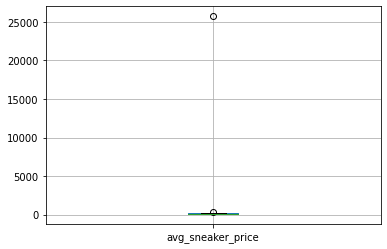

In [9]:
df_sneaker_price.boxplot(column='avg_sneaker_price', return_type='axes');

<AxesSubplot:xlabel='shop_id', ylabel='avg_sneaker_price'>

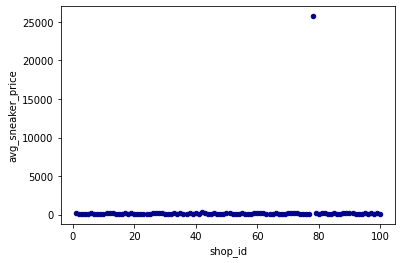

In [10]:
df_sneaker_price.plot.scatter(x='shop_id',
                         y='avg_sneaker_price',
                      c='DarkBlue')

In [11]:
df_sneaker_price.describe()

,shop_id,avg_sneaker_price
count,100.000000,100.000000
mean,50.500000,407.990000
std,29.011492,2557.462906
min,1.000000,90.000000
25%,25.750000,132.750000
50%,50.500000,153.000000
75%,75.250000,168.250000
max,100.000000,25725.000000


In [12]:
df_sneaker_price[df_sneaker_price['avg_sneaker_price'] == df_sneaker_price['avg_sneaker_price'].max()]

,shop_id,avg_sneaker_price
0,78,25725.0


` Given that the 3rd Quantile is just $168.2 and the maximum value is $25725, shop 78 is clearly an outlier `

` Our primary aim is to analyse the AOV for our shops. Given that each shop sells just one model of sneakers, we are essentially trying to determine our average sneaker price.  Shop 78 has a sneaker price of $25,725 which is rather disturbing and needs to be checked. In order not to disrupt our analysis (if we’re adamant on using the average sneaker price) then we should not include this shop’s price in our calculations. As such, our AOV would be obtained as follows.`

In [13]:
df_sneaker_price[df_sneaker_price['avg_sneaker_price'] != df_sneaker_price['avg_sneaker_price'].max()]['avg_sneaker_price'].mean()

152.26262626262627

`This gives an average order value of $152.26. As it’s against data best practices to delete data, we’ll explore other methods.`

## Median Order Value

` Another method would be to use the median instead, this is more robust and helps dampen the effect of outliers on the Order Values. This is implemented as follows: `

In [14]:
df_sneaker_price['avg_sneaker_price'].median()

153.0

`The median order value obtained is $153.`

## Modal Order Value

` One more method would be to find the modal sneaker price (most occuring)`

In [15]:
df_sneaker_price['avg_sneaker_price'].mode()

0    153.0
dtype: float64

` This yields a modal order value of $153. `

# Question 1b: What metric would you report for this dataset?

`I would report the median order value (sneaker prices) as this is safer than the omission method and reduces the effect of outliers. Hence it gives a more accurate description of the value of each order across all 100 shops.`

# Question 1c: What is its value?

` Its value is $153 `

# Question 2a: How many orders were shipped by Speedy Express in total?

Select count(*) from Orders O <br />
inner join Shippers S <br />
on O.ShipperID = S.ShipperID <br />
where S.ShipperName = "Speedy Express"

`54`

# Question 2b: What is the last name of the employee with the most orders?

Select E.LastName, count(*) as OrderCount from [Orders] O <br />
join [Employees] E <br />
on O.EmployeeID = E.EmployeeID <br />
group by E.LastName <br />
order by OrderCount desc limit 1

`Peacock`

# Question 2c: What product was ordered the most by customers in Germany?

Select ProductName from <br />
(Select ProductID, Country, SUM(Quantity) FinalQuantity from OrderDetails OD <br />
left join <br />
(Select O.OrderID, O.CustomerID, C.Country from Orders O <br />
left join (Select CustomerID, Country from Customers) C <br />
on O.CustomerID = C.CustomerID) cust <br />
on OD.OrderID = cust.OrderID <br />
group by Country, ProductID having Country = 'Germany') G <br />
left join (Select ProductID, ProductName from Products) P <br />
on G.ProductID = P.ProductID <br />
order by FinalQuantity desc limit 1

`Boston Crab Meat`